# ALP Project
### Fill missing value & handling imbalanced data

In [1]:
#input dataset
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/mjohantito/DataMining_APLProject/main/Dataset_Terapi_Kelenjar_Getah_Bening.csv")
df

,gender,age,Time,Number_of_Warts,Type,Area,induration_diameter,Result_of_Treatment
0,1,15,11.00,6.0,1.0,30,25.0,0
1,1,27,11.75,NaN,1.0,208,6.0,0
2,1,32,12.00,9.0,1.0,43,50.0,0
3,1,33,1.75,7.0,2.0,379,7.0,0
4,1,34,5.00,7.0,3.0,64,7.0,0
...,...,...,...,...,...,...,...,...
85,2,51,4.00,1.0,1.0,65,7.0,1
86,2,51,6.00,6.0,NaN,80,2.0,1
87,2,52,2.25,5.0,1.0,63,7.0,1
88,2,53,10.00,1.0,2.0,30,25.0,1


# EDA

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               90 non-null     int64  
 1   age                  90 non-null     int64  
 2   Time                 87 non-null     float64
 3   Number_of_Warts      89 non-null     float64
 4   Type                 85 non-null     float64
 5   Area                 90 non-null     int64  
 6   induration_diameter  88 non-null     float64
 7   Result_of_Treatment  90 non-null     int64  
dtypes: float64(4), int64(4)
memory usage: 5.8 KB


In [3]:
#rename column
df.rename(columns = {'gender' : 'gender','age' : 'age','Time':'time','Number_of_Warts':'warts_count','Type':'type','Area':'area','induration_diameter':'induration_diameter','Result_of_Treatment':'treatment_result'},inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               90 non-null     int64  
 1   age                  90 non-null     int64  
 2   time                 87 non-null     float64
 3   warts_count          89 non-null     float64
 4   type                 85 non-null     float64
 5   area                 90 non-null     int64  
 6   induration_diameter  88 non-null     float64
 7   treatment_result     90 non-null     int64  
dtypes: float64(4), int64(4)
memory usage: 5.8 KB


In [4]:
df.describe()

,gender,age,time,warts_count,type,area,induration_diameter,treatment_result
count,90.000000,90.000000,87.000000,89.000000,85.000000,90.000000,88.000000,90.000000
mean,1.544444,31.044444,7.221264,6.123596,1.752941,95.700000,14.500000,0.788889
std,0.500811,12.235435,3.151325,4.231431,0.829599,136.614643,17.378147,0.410383
min,1.000000,15.000000,1.000000,1.000000,1.000000,6.000000,2.000000,0.000000
25%,1.000000,20.250000,5.000000,2.000000,1.000000,35.500000,5.000000,1.000000
50%,2.000000,28.500000,7.750000,6.000000,2.000000,53.000000,7.000000,1.000000
75%,2.000000,41.750000,10.000000,9.000000,2.000000,80.750000,9.000000,1.000000
max,2.000000,56.000000,12.000000,19.000000,3.000000,900.000000,70.000000,1.000000


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

gender                 0
age                    0
time                   3
warts_count            1
type                   5
area                   0
induration_diameter    2
treatment_result       0
dtype: int64

<AxesSubplot:>

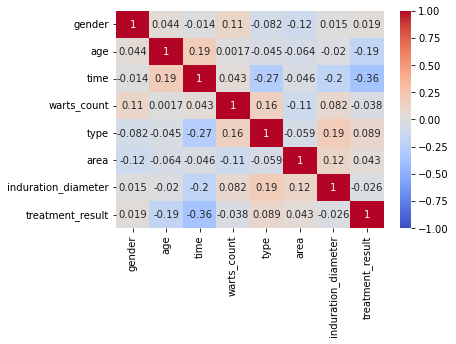

In [7]:
import seaborn as sns

sns.heatmap(df.corr(), cmap="coolwarm", vmin=-1, vmax=1, annot=True)

# Create Model for Fill Null

### Classification untuk fill Type
#### Menggunakan SVC (Support Vector Classification)

In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy import stats

In [9]:
#create traintest set by dropping null value di column yang akan digunakan
df1 = df.dropna(axis=0, subset=['type','warts_count','induration_diameter','time'])
df1 = df1.loc[:,['type','warts_count','induration_diameter','time']]
df1

,type,warts_count,induration_diameter,time
0,1.0,6.0,25.0,11.00
2,1.0,9.0,50.0,12.00
3,2.0,7.0,7.0,1.75
4,3.0,7.0,7.0,5.00
5,1.0,14.0,6.0,12.00
...,...,...,...,...
83,1.0,7.0,25.0,10.25
84,2.0,4.0,9.0,9.00
85,1.0,1.0,7.0,4.00
87,1.0,5.0,7.0,2.25


In [10]:
df1.isnull().sum()

type                   0
warts_count            0
induration_diameter    0
time                   0
dtype: int64

In [11]:
X = df1[['warts_count','induration_diameter','time']]
y = df1['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)

from sklearn import svm
svm_clf = svm.SVC()
svm_clf.fit(X_train, y_train)

SVC()

In [12]:
y_pred = svm_clf.predict(X_test)
comparison_table = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
comparison_table

,y_test,y_pred
56,1.0,1.0
31,3.0,3.0
34,1.0,1.0
71,2.0,1.0
51,1.0,1.0
78,3.0,3.0
83,1.0,1.0
85,1.0,1.0
55,1.0,1.0
64,1.0,1.0


In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[9 0 0]
 [1 0 0]
 [0 0 2]]
Accuracy Score:  0.9166666666666666


### Regression untuk fill Time
#### Menggunakan Random Forest

<Figure size 720x576 with 0 Axes>

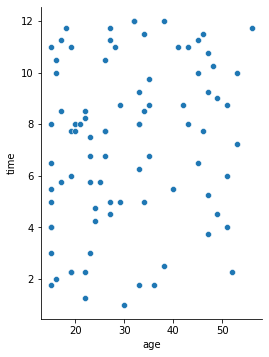

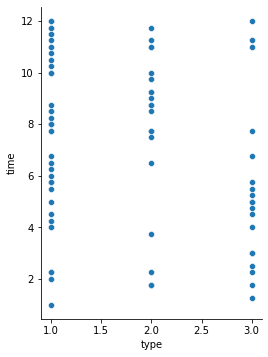

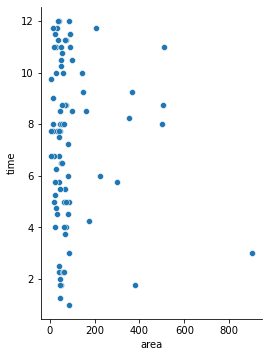

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['age'], y_vars=['time'], height=5, aspect=0.75)
sns.pairplot(data=df, x_vars=['type'], y_vars=['time'], height=5, aspect=0.75)
sns.pairplot(data=df, x_vars=['area'], y_vars=['time'], height=5, aspect=0.75)

plt.show()

In [15]:
df2 = df.dropna(axis=0, subset=['time','age','type','area'])
df2 = df2.loc[:,['time','age','type','area']]
df2

,time,age,type,area
0,11.00,15,1.0,30
1,11.75,27,1.0,208
2,12.00,32,1.0,43
3,1.75,33,2.0,379
4,5.00,34,3.0,64
...,...,...,...,...
83,10.25,48,1.0,50
84,9.00,49,2.0,14
85,4.00,51,1.0,65
87,2.25,52,1.0,63


In [16]:
from sklearn.linear_model import LinearRegression

X = df2[['age','type','area']]
y = df2['time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) #random_state

#from sklearn.svm import SVR
#import numpy as np

#svr = SVR().fit(X, y)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf.fit(X,y)

RandomForestRegressor(random_state=0)

In [17]:
pd.options.display.float_format = '{:0.2f}'.format
y_pred = rf.predict(X_test)
compare = pd.DataFrame({'Prediction' : y_pred, 'Actual' : y_test})

compare

,Prediction,Actual
11,8.43,11.00
76,7.65,8.00
51,5.27,5.50
58,8.49,11.25
42,7.96,8.75
70,6.94,6.75
63,6.15,7.75
88,9.68,10.00
83,9.72,10.25
48,10.04,10.00


In [18]:
def MAPE(y_test,y_pred):
    mape = np.mean(np.abs((y_test - y_pred)/y_test))*100
    return mape

LR_MAPE= MAPE(y_test, y_pred)
print("MAPE: ",LR_MAPE)
print('Model Score: ', rf.score(np.array(X_test), y_test))

MAPE:  11.427070297627202
Model Score:  0.751603138669327


/Users/manueljohantito/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# Fill Null

In [19]:
df.isnull().sum()

gender                 0
age                    0
time                   3
warts_count            1
type                   5
area                   0
induration_diameter    2
treatment_result       0
dtype: int64

In [20]:
df[df['time'].isna()]

,gender,age,time,warts_count,type,area,induration_diameter,treatment_result
43,1,38,NaN,8.00,2.00,56,45.00,1
50,1,54,NaN,13.00,3.00,43,5.00,1
72,2,28,NaN,4.00,1.00,9,2.00,1


In [21]:
df[df['type'].isna()]

,gender,age,time,warts_count,type,area,induration_diameter,treatment_result
10,2,26,10.50,6.00,NaN,50,9.00,0
26,1,20,8.00,6.00,NaN,45,8.00,1
66,2,23,6.75,6.00,NaN,19,2.00,1
86,2,51,6.00,6.00,NaN,80,2.00,1
89,2,53,7.25,6.00,NaN,81,7.00,1


In [22]:
df[df['warts_count'].isna()]

,gender,age,time,warts_count,type,area,induration_diameter,treatment_result
1,1,27,11.75,NaN,1.00,208,6.00,0


In [23]:
df[df['induration_diameter'].isna()]

,gender,age,time,warts_count,type,area,induration_diameter,treatment_result
19,1,15,4.00,4.00,3.00,25,NaN,1
53,2,15,6.50,19.00,1.00,56,NaN,1


In [24]:
df_typemiss = df['type'].isna()
var_typemiss = pd.DataFrame(df[['warts_count','induration_diameter','time']][df_typemiss])
type_pred = svm_clf.predict(var_typemiss)
missingval = df['type'].isna()
df.loc[missingval,'type'] = type_pred

In [25]:
df_timemiss = df['time'].isna()
var_timemiss = pd.DataFrame(df[['age','type','area']][df_timemiss])
time_pred = rf.predict(var_timemiss)
missingval = df['time'].isna()
df.loc[missingval,'time'] = time_pred

In [26]:
df['warts_count'] = df['warts_count'].fillna(df['warts_count'].mode()[0])

In [27]:
df['induration_diameter'] = df['induration_diameter'].fillna(np.floor(df['induration_diameter'].mean()))

In [28]:
df.isnull().sum()

gender                 0
age                    0
time                   0
warts_count            0
type                   0
area                   0
induration_diameter    0
treatment_result       0
dtype: int64

In [29]:
df.iloc[[10,26,66,86,89]]

,gender,age,time,warts_count,type,area,induration_diameter,treatment_result
10,2,26,10.50,6.00,1.00,50,9.00,0
26,1,20,8.00,6.00,1.00,45,8.00,1
66,2,23,6.75,6.00,1.00,19,2.00,1
86,2,51,6.00,6.00,1.00,80,2.00,1
89,2,53,7.25,6.00,1.00,81,7.00,1


In [30]:
df.iloc[[43,50,72]]

,gender,age,time,warts_count,type,area,induration_diameter,treatment_result
43,1,38,8.20,8.00,2.00,56,45.00,1
50,1,54,4.69,13.00,3.00,43,5.00,1
72,2,28,7.00,4.00,1.00,9,2.00,1


In [31]:
df.iloc[[1]]

,gender,age,time,warts_count,type,area,induration_diameter,treatment_result
1,1,27,11.75,2.00,1.00,208,6.00,0


In [32]:
df.iloc[[19,53]]

,gender,age,time,warts_count,type,area,induration_diameter,treatment_result
19,1,15,4.00,4.00,3.00,25,14.00,1
53,2,15,6.50,19.00,1.00,56,14.00,1


# Handling Imbalance Data

In [33]:
df.info() #ganti int - warts_count, type, induration_diameter

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               90 non-null     int64  
 1   age                  90 non-null     int64  
 2   time                 90 non-null     float64
 3   warts_count          90 non-null     float64
 4   type                 90 non-null     float64
 5   area                 90 non-null     int64  
 6   induration_diameter  90 non-null     float64
 7   treatment_result     90 non-null     int64  
dtypes: float64(4), int64(4)
memory usage: 5.8 KB


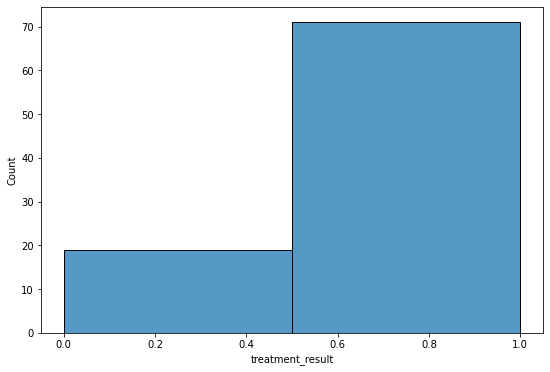

In [34]:
#Check Imbalanced Data
fig = plt.subplots(figsize=(9,6))
sns.histplot(data=df['treatment_result'],bins=2)
plt.show()

In [35]:
x = df.drop(['treatment_result'],axis=1)
y = df['treatment_result']

In [36]:
#dealing imbalanced data by over_sampling
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=30)
x_sampling,y_sampling = sm.fit_resample(x,y)

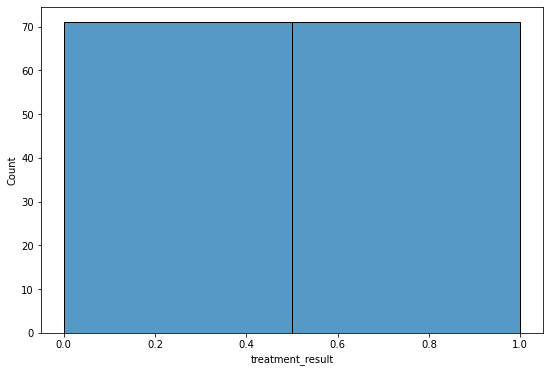

In [37]:
#After over_sampling check
fig = plt.subplots(figsize=(9,6))
sns.histplot(data=y_sampling, bins=2)
plt.show()

## Modelling for Next Prediction

### EDA

In [38]:
df_final = pd.DataFrame(x_sampling)
df_final['treatment_result'] = y_sampling
df_final

,gender,age,time,warts_count,type,area,induration_diameter,treatment_result
0,1,15,11.00,6.00,1.00,30,25.00,0
1,1,27,11.75,2.00,1.00,208,6.00,0
2,1,32,12.00,9.00,1.00,43,50.00,0
3,1,33,1.75,7.00,2.00,379,7.00,0
4,1,34,5.00,7.00,3.00,64,7.00,0
...,...,...,...,...,...,...,...,...
137,1,32,10.68,4.14,1.36,159,7.07,0
138,1,38,11.99,13.86,1.00,86,5.99,0
139,1,32,4.80,6.64,2.94,63,7.00,0
140,1,39,7.71,5.75,2.17,75,14.51,0


In [39]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               142 non-null    int64  
 1   age                  142 non-null    int64  
 2   time                 142 non-null    float64
 3   warts_count          142 non-null    float64
 4   type                 142 non-null    float64
 5   area                 142 non-null    int64  
 6   induration_diameter  142 non-null    float64
 7   treatment_result     142 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 9.0 KB


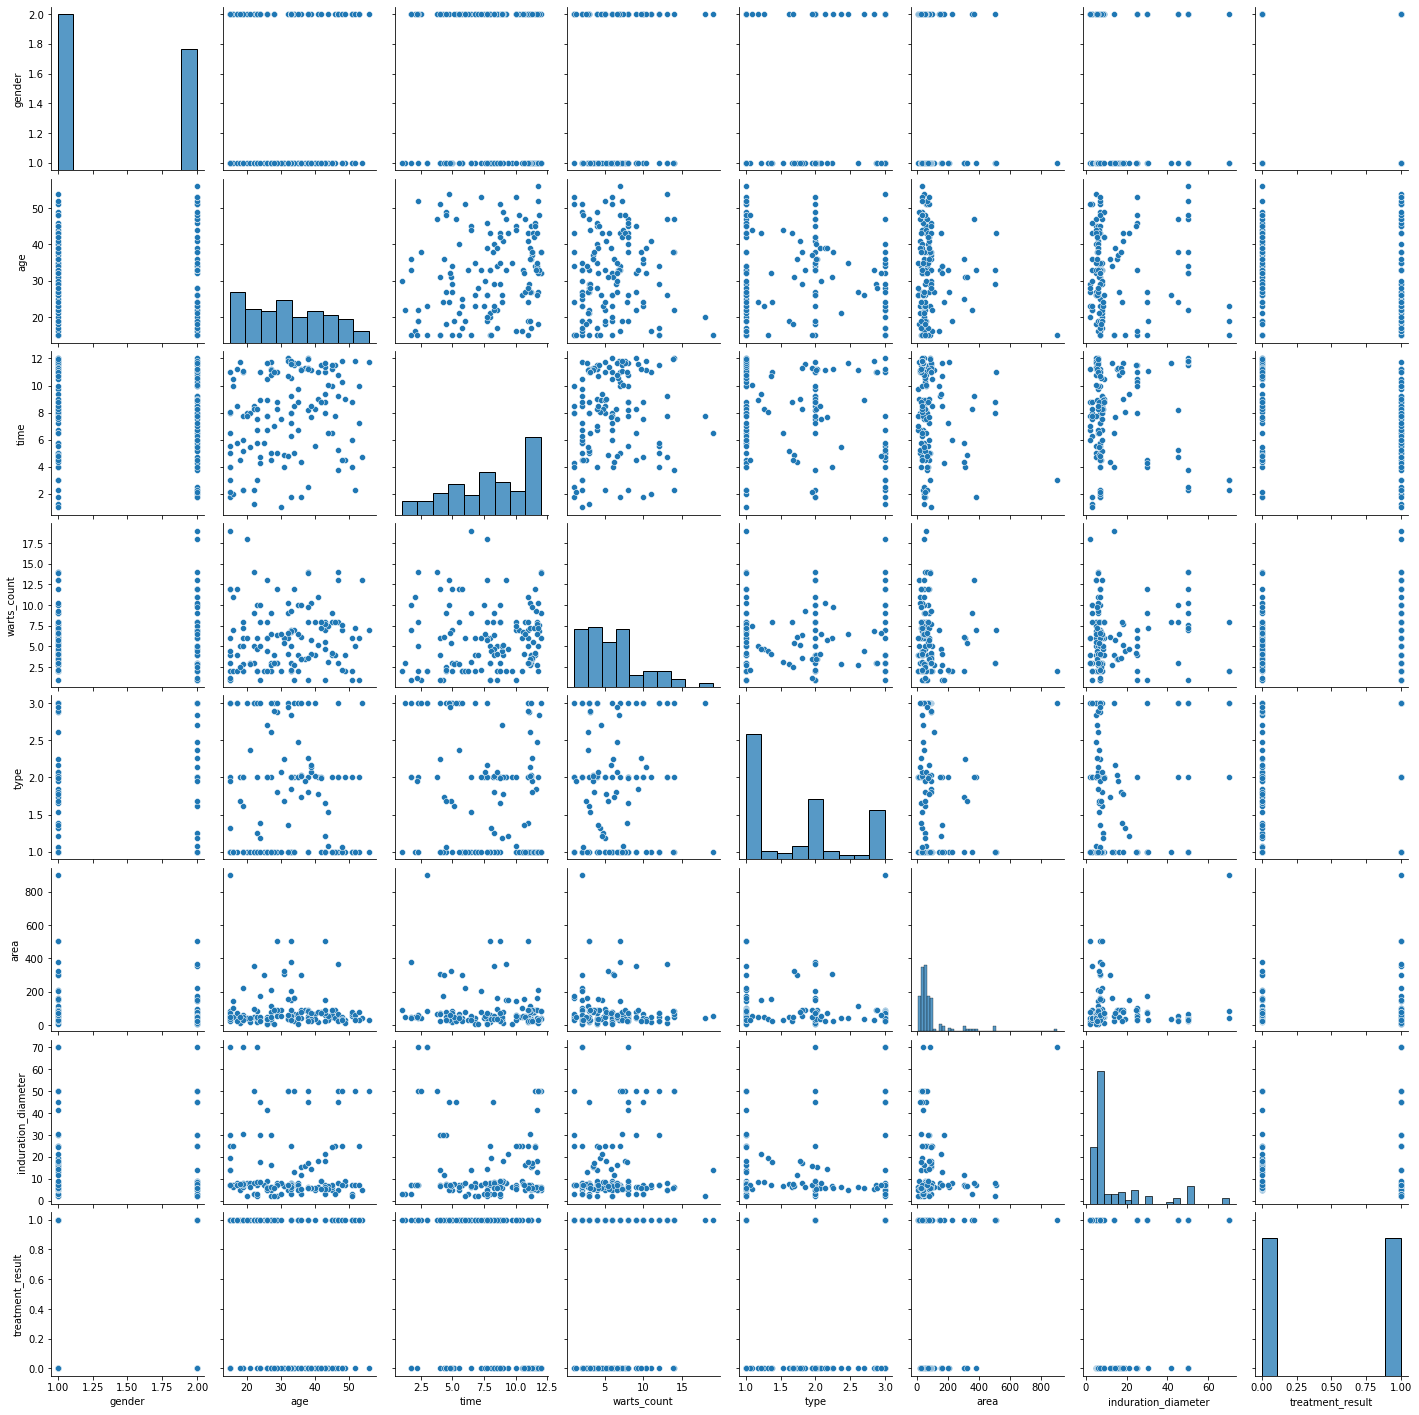

In [40]:
sns.pairplot(data=df_final)

<AxesSubplot:>

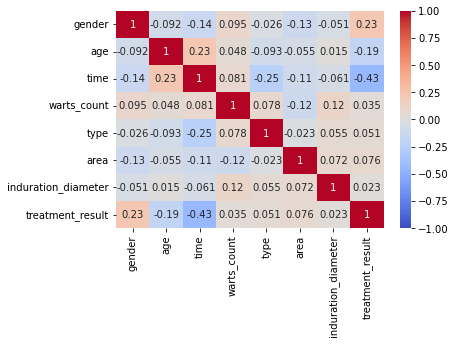

In [41]:
sns.heatmap(df_final.corr(), cmap="coolwarm", vmin=-1, vmax=1, annot=True)

## Regression

In [42]:
X = df_final[['age','type','area']]
y = df_final['time']

In [43]:
from sklearn.svm import SVR
svr = SVR().fit(X, y)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X,y)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf.fit(X,y)

RandomForestRegressor(random_state=0)

In [44]:
svr_y_pred = svr.predict(X_test)
lr_y_pred = lr.predict(X_test)
dt_y_pred = dt.predict(X_test)
rf_y_pred = rf.predict(X_test)
evaluate = pd.DataFrame({"y_test":y_test,"svr_y_pred":svr_y_pred, "lr_y_pred":lr_y_pred, "dt_y_pred":dt_y_pred, "rf_y_pred":rf_y_pred})
evaluate.head(10)

,y_test,svr_y_pred,lr_y_pred,dt_y_pred,rf_y_pred
11,11.00,8.88,6.48,11.00,8.95
76,8.00,8.19,7.55,8.00,7.80
51,5.50,7.97,7.76,5.50,5.21
58,11.25,8.34,5.91,11.25,9.42
42,8.75,8.68,7.90,8.75,8.81
70,6.75,7.77,8.51,6.75,7.06
63,7.75,8.03,6.15,7.75,5.94
88,10.00,8.45,9.05,10.00,9.83
83,10.25,8.63,9.66,10.25,9.72
48,10.00,8.70,9.46,10.00,9.64


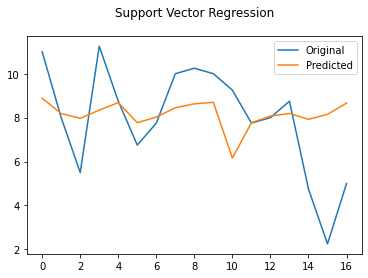

In [45]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Original")
plt.plot(x_ax, svr_y_pred, label="Predicted")
plt.title("Support Vector Regression", pad=20)
plt.legend(loc='best')

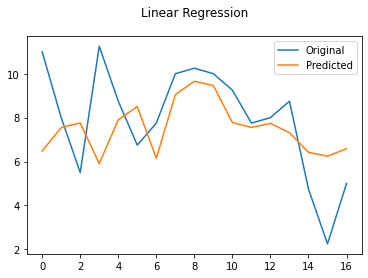

In [46]:
plt.plot(x_ax, y_test, label="Original")
plt.plot(x_ax, lr_y_pred, label="Predicted")
plt.title("Linear Regression", pad=20)
plt.legend(loc='best')

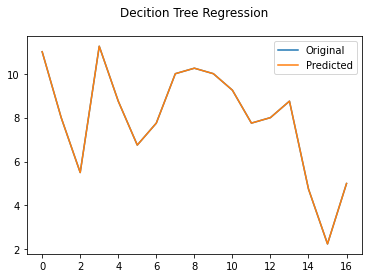

In [47]:
plt.plot(x_ax, y_test, label="Original")
plt.plot(x_ax, dt_y_pred, label="Predicted")
plt.title("Decition Tree Regression", pad=20)
plt.legend(loc='best')

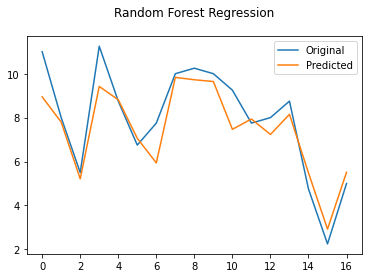

In [48]:
plt.plot(x_ax, y_test, label="Original")
plt.plot(x_ax, rf_y_pred, label="Predicted")
plt.title("Random Forest Regression", pad=20)
plt.legend(loc='best')

In [49]:
print("Support Vector Regression")
LR_MAPE= MAPE(y_test, svr_y_pred)
print("MAPE: ",LR_MAPE)
print('Model Score: ', svr.score(np.array(X_test), y_test))
print('\n')

print("Linear Regression")
LR_MAPE= MAPE(y_test, lr_y_pred)
print("MAPE: ",LR_MAPE)
print('Model Score: ', lr.score(np.array(X_test), y_test))
print('\n')

print("Decision Tree Regression")
LR_MAPE= MAPE(y_test, dt_y_pred)
print("MAPE: ",LR_MAPE)
print('Model Score: ', dt.score(np.array(X_test), y_test))
print('\n')

print("Random Forest Regression")
LR_MAPE= MAPE(y_test, rf_y_pred)
print("MAPE: ",LR_MAPE)
print('Model Score: ', rf.score(np.array(X_test), y_test))

Support Vector Regression
MAPE:  35.2467608886858
Model Score:  0.00784391217901348


Linear Regression
MAPE:  29.119737489613534
Model Score:  0.08338835884230933


Decision Tree Regression
MAPE:  0.0
Model Score:  1.0


Random Forest Regression
MAPE:  10.321251639384322
Model Score:  0.8234506852080099


/Users/manueljohantito/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/Users/manueljohantito/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/manueljohantito/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/Users/manueljohantito/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## Classification

In [50]:
df_final[['warts_count','type','induration_diameter']]=df_final[['warts_count','type','induration_diameter']].astype('int64')
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               142 non-null    int64  
 1   age                  142 non-null    int64  
 2   time                 142 non-null    float64
 3   warts_count          142 non-null    int64  
 4   type                 142 non-null    int64  
 5   area                 142 non-null    int64  
 6   induration_diameter  142 non-null    int64  
 7   treatment_result     142 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 9.0 KB


In [51]:
X = df_final[['warts_count','induration_diameter','time']]
y = df_final['type']

In [52]:
from sklearn import preprocessing
from sklearn import utils

lab = preprocessing.LabelEncoder()
y = lab.fit_transform(y)
y

array([0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 2,
       0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 0, 1, 0, 1, 2, 2, 0, 0, 1, 2, 1, 1,
       2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 2, 0, 0,
       0, 1, 2, 0, 0, 1, 0, 0, 0, 1, 0, 2, 2, 0, 2, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0])

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

from sklearn import svm
svm_clf = svm.SVC()
svm_clf.fit(X_train, y_train)

SVC()

In [77]:
y_pred = svm_clf.predict(X_test)
comparison_table = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
comparison_table.head()

,y_test,y_pred
0,0,0
1,2,0
2,1,0
3,0,0
4,0,0


In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[30  0  0]
 [ 9  0  0]
 [ 4  0  0]]
Accuracy Score:  0.6976744186046512


## Clustering

In [79]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
standardized_data = sc.fit_transform(df_final)
standardized_data

array([[-8.80340843e-01, -1.53093794e+00,  9.85601302e-01, ...,
        -5.15958404e-01,  7.31451952e-01, -1.00000000e+00],
       [-8.80340843e-01, -4.51617191e-01,  1.22785525e+00, ...,
         1.01651687e+00, -5.05050157e-01, -1.00000000e+00],
       [-8.80340843e-01, -1.90021259e-03,  1.30860657e+00, ...,
        -4.04036052e-01,  2.35842841e+00, -1.00000000e+00],
       ...,
       [-8.80340843e-01, -1.90021259e-03, -1.01584606e+00, ...,
        -2.31847819e-01, -4.39971099e-01, -1.00000000e+00],
       [-8.80340843e-01,  6.27703557e-01, -7.64525986e-02, ...,
        -1.28534878e-01,  1.55823097e-02, -1.00000000e+00],
       [-8.80340843e-01,  8.97533745e-01,  2.64965692e-01, ...,
        -1.45753702e-01, -3.09812982e-01, -1.00000000e+00]])

In [81]:
standardized_df = pd.DataFrame(standardized_data,columns=['gender','age','time','warts_count','type','area','induration_diameter','treatment_result'])
standardized_df.head(5)

,gender,age,time,warts_count,type,area,induration_diameter,treatment_result
0,-0.88,-1.53,0.99,0.07,-0.79,-0.52,0.73,-1.00
1,-0.88,-0.45,1.23,-1.01,-0.79,1.02,-0.51,-1.00
2,-0.88,-0.00,1.31,0.88,-0.79,-0.40,2.36,-1.00
3,-0.88,0.09,-2.00,0.34,0.58,2.49,-0.44,-1.00
4,-0.88,0.18,-0.95,0.34,1.94,-0.22,-0.44,-1.00


In [82]:
standardized_df.describe()

,gender,age,time,warts_count,type,area,induration_diameter,treatment_result
count,142.00,142.00,142.00,142.00,142.00,142.00,142.00,142.00
mean,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.88,-1.53,-2.24,-1.29,-0.79,-0.72,-0.77,-1.00
25%,-0.88,-0.81,-0.79,-0.74,-0.79,-0.47,-0.57,-1.00
50%,-0.88,-0.00,0.10,-0.20,-0.79,-0.30,-0.44,0.00
75%,1.14,0.81,0.99,0.34,0.58,-0.03,0.06,1.00
max,1.14,2.16,1.31,3.60,1.94,6.97,3.66,1.00


### KMeans

In [86]:
from sklearn.cluster import KMeans
wcss = [] #within cluster sum of square


# check the inertia for each K
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state=42)
    kmeans.fit(standardized_df)
    wcss.append(kmeans.inertia_)


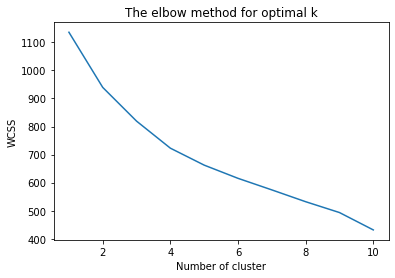

In [87]:
plt.plot(range(1,11), wcss)
plt.title('The elbow method for optimal k')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

In [88]:
from kneed import KneeLocator
kn = KneeLocator(range(1,11),wcss, curve='convex', direction='decreasing')
print('the optimal k is ',kn.knee)

the optimal k is  4


In [92]:
X = standardized_data
kmeans = KMeans(init='random',n_clusters = 4, n_init = 300, random_state = 1).fit(X)
kmeans.labels_

array([0, 0, 0, 3, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 3,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 3, 2, 1, 1, 2, 2, 3, 1, 1, 2, 2, 2,
       2, 1, 3, 2, 0, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 3,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 1, 2, 2, 3, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [93]:
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [95]:
df_final.head()

,gender,age,time,warts_count,type,area,induration_diameter,treatment_result
0,1,15,11.00,6,1,30,25,0
1,1,27,11.75,2,1,208,6,0
2,1,32,12.00,9,1,43,50,0
3,1,33,1.75,7,2,379,7,0
4,1,34,5.00,7,3,64,7,0


In [102]:
df_final['KMeans_Clusters'] = y_kmeans

df_final.groupby("KMeans_Clusters").agg(Gender = ('gender', pd.Series.mode), 
                          Age = ('age', 'mean'), 
                          Time = ('time', 'mean'), 
                          Warts_Count = ('warts_count', 'mean'), 
                          Type = ('type', pd.Series.mode), 
                          Area = ('area', 'mean'), 
                          Induration_Diameter = ('induration_diameter', 'mean'), 
                          Treatment_Result = ('treatment_result', pd.Series.mode), 
                          Count = ('KMeans_Clusters', 'count'))

,Gender,Age,Time,Warts_Count,Type,Area,Induration_Diameter,Treatment_Result,Count
KMeans_Clusters,,,,,,,,,
0,1,36.41,10.26,5.88,1,67.24,14.66,0,58
1,2,28.17,7.13,3.85,1,58.81,8.00,1,48
2,1,29.52,4.90,9.04,3,52.04,23.40,1,25
3,1,31.36,6.27,5.73,1,431.45,12.27,1,11


In [100]:
from sklearn.metrics import silhouette_score

silhouette_score(X,y_kmeans)

0.20142838947371358

### Hierachical

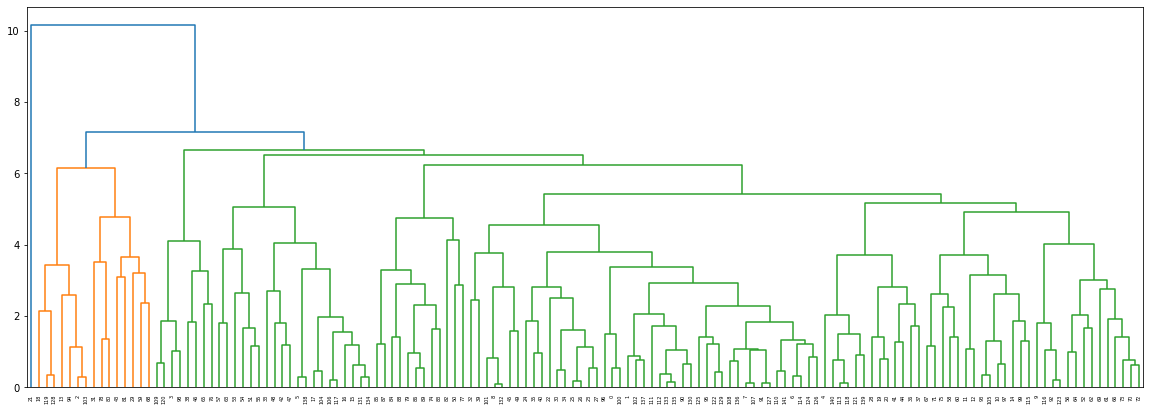

In [103]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(20,7))
linkage_data = linkage(X, method='complete')
dendrogram(linkage_data)
plt.show()

In [107]:
from sklearn.cluster import AgglomerativeClustering

hierarchical_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
labels = hierarchical_cluster.fit_predict(X)
labels

array([0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [108]:
df_final['hierarchical_cluster'] = y_kmeans

df_final.groupby("hierarchical_cluster").agg(Gender = ('gender', pd.Series.mode), 
                          Age = ('age', 'mean'), 
                          Time = ('time', 'mean'), 
                          Warts_Count = ('warts_count', 'mean'), 
                          Type = ('type', pd.Series.mode), 
                          Area = ('area', 'mean'), 
                          Induration_Diameter = ('induration_diameter', 'mean'), 
                          Treatment_Result = ('treatment_result', pd.Series.mode), 
                          Count = ('hierarchical_cluster', 'count'))

,Gender,Age,Time,Warts_Count,Type,Area,Induration_Diameter,Treatment_Result,Count
hierarchical_cluster,,,,,,,,,
0,1,36.41,10.26,5.88,1,67.24,14.66,0,58
1,2,28.17,7.13,3.85,1,58.81,8.00,1,48
2,1,29.52,4.90,9.04,3,52.04,23.40,1,25
3,1,31.36,6.27,5.73,1,431.45,12.27,1,11


In [112]:
from sklearn.metrics import silhouette_score
silhouette_score(X,labels)

0.239003031187957